# DSC320: Eigenvalues, Eigenvectors, and PCA

**Name**: Joseph Choi <br>
**Class**: DSC410-T301 Predictive Analytics (2243-1)

In [45]:
# Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## 1. Find the Eigenvalues and Eigenvectors of a Matrix

In [5]:
# Defining matrix A per instruction
A = np.array([
    [4, 0, 1],
    [-1, -6, -2],
    [5, 0, 0]
])

# Printing result:
A

array([[ 4,  0,  1],
       [-1, -6, -2],
       [ 5,  0,  0]])

### (a + b): 
- Is the vector [123] an eigenvector of A? Verify your answer with a calculation in Python
- Is the vector [010] an eigenvector of A? Verify your answer with a calculation in Python

In [28]:
"""
Code Description:
    - Verify if provided vectors are eigenvectors of matrix A 
    - Condition: 
        - If A*v is equal to lambda*v (where A is the matrix, v is the eigenvector,  lambda is the first eigenvalue), v is confirmed to be an eigenvector of A
Code Breakdown:
    - 1st Part: Defining the vectors for both a & b(v1 and v2)
        Vectors are used to be tested as eigenvectors of matrix A
    - 2nd Part: Computing A * v for both vectors (Av1 and Av2)
        - Matrix-vector multiplication between A and v1/v2
        - These transformed vectors are necessary to verify if the given vectors are eigenvectors
    - 3rd Part: Computing eigenvalues and eigenvectors of A
        - via "np.linalg.eig(A)"
    - 4th Part: Checking if v1 and v2 are eigenvectors by comparing A*v to lambda*v
        - Using "allclose()" to check if two specified arraysa are equal within a tolerance
        - Comparing A*v with the first eigenvalue (lambda) multiplied by v 
"""

# Defining the vectors
v1 = np.array([1, 2, 3])
v2 = np.array([0, 1, 0])

# Computing A * v for both vectors
Av1 = np.dot(A, v1)
Av2 = np.dot(A, v2)

# Computing eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# Checking if v1 and v2 are eigenvectors
is_eigenvector_v1 = np.allclose(np.dot(A, v1), eigenvalues[0] * v1)
is_eigenvector_v2 = np.allclose(np.dot(A, v2), eigenvalues[0] * v2)

The vector [123] is not an eigenvector of A
The vector [010] is an eigenvector of A with eigenvalue -6.0


In [32]:
# Printing result for 1a:
is_eigenvector_v1

False

In [ ]:
# Printing result for 1b:
is_eigenvector_v2

#### Output:
- **Condition**: If A*v is equal to lambda*v, v is confirmed to be an eigenvector of A
- **1a**: Vector [123] is not an eigenvector of A as it does not meet the condition
- **1b**: Vector [010] is an eigenvector of A with eigenvalue -6.0 is it does meet the condition

### (c) Use Python to find all of the eigenvalues and eigenvectors of A

In [33]:
# Computing eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

In [30]:
# Printing all of the eigenvalues of A
eigenvalues

array([-6.,  5., -1.])

In [31]:
# Printing all of the eigenvectors of A
eigenvectors

array([[ 0.        ,  0.69431384, -0.18493168],
       [ 1.        , -0.18935832, -0.33287702],
       [ 0.        ,  0.69431384,  0.9246584 ]])

## 2. Principal Component Analysis

In [37]:
# Loading and printing csv file 'video_game_data'
video_game_df = pd.read_csv('video_game_data.csv')
video_game_df.head(10)

,name,critic_score,user_score,total_shipped
0,Mario Kart Wii,8.2,9.1,37.14
1,Wii Sports Resort,8.0,8.8,33.09
2,New Super Mario Bros.,9.1,8.1,30.80
3,New Super Mario Bros. Wii,8.6,9.2,30.22
4,Mario Kart DS,9.1,9.4,23.60
5,Pokemon X/Y,8.9,9.7,16.37
6,Pokemon Black / White Version,8.6,9.0,15.64
7,Halo 3,9.6,9.5,14.50
8,Super Smash Bros. Brawl,9.2,9.7,13.29
9,Super Mario Galaxy,9.7,9.6,12.78


### (a) Make a scatterplot of the user scores versus critics scores 

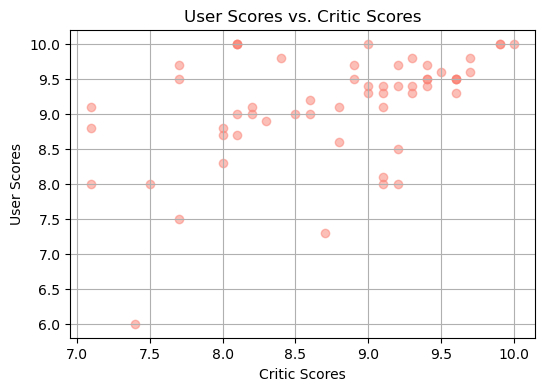

In [46]:
# Scatterplot: UserScores vs. CriticsScores

# Extracting the critic scores and user scores from the DataFrame
critic_scores_col = video_game_df['critic_score']
user_scores_col = video_game_df['user_score']

# Creating a scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(critic_scores_col, user_scores_col, color='salmon', alpha=0.5)

# Adding labels and title
plt.title('User Scores vs. Critic Scores')
plt.xlabel('Critic Scores')
plt.ylabel('User Scores')

# Printing the scatterplot
plt.grid(True)
plt.show()

### (b) On your scatterplot from part (a), sketch the approximate directions of the first and second principal components

#### Output:
- Picture of the sketch attached
- My Steps:
    - Find the middle point (average location) of all the dots on the map
    - From the middle point, draw the PC1 line in the direction where most of the dots are
    - For PC2, draw a line perpendicular to the PC1 line. It should show the next biggest stretch of dots.